# Prototipo 1

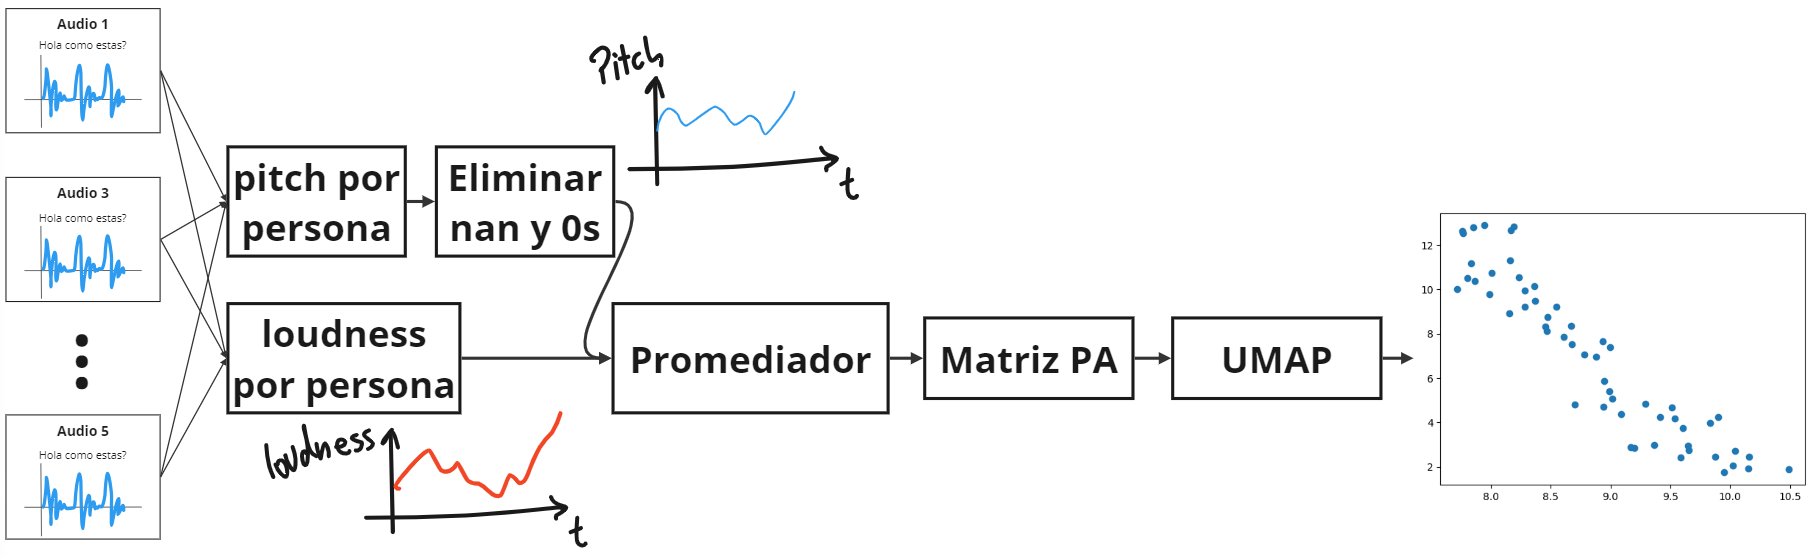

In [3]:
import librosa
import math

def PitchPorPersona(y,sr):
    f0, voiced_flag, voiced_probs=librosa.pyin(
        y,
        fmin=librosa.note_to_hz('C2'),
        fmax=librosa.note_to_hz('C7'),
        sr=sr)
    f0 = [x for x in f0 if not isinstance(x, float) or not math.isnan(x)]
    f0 = [i for i in f0 if i != 0]
    return f0

In [4]:
import numpy as np

def Promediador(x):
    return np.mean(x)

In [5]:
import pyloudnorm as pyln
import librosa 

def LoudnessPorPersona(y,sr):
    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(y)
    return loudness

Utilizar $\texttt{append}$ y $\texttt{data[i] = [p,l]}$ dieron los mismo resultados en tiempo de procesamiento ($\approx$ 56 s)

In [6]:
def CalculadoraParametrosAcusticos(cant_audios):
    data = []
    for i in range(cant_audios):
        path = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/VocesAlamacenadas/HolaComoEstas/Normal/HolaComoEstas{i}.opus'
        y,sr = librosa.load(path)
        p=Promediador(PitchPorPersona(y,sr))
        l=Promediador(LoudnessPorPersona(y,sr))
        data.append([p,l])
    return data

In [7]:
cant_audios=56
BaseDeDatos=CalculadoraParametrosAcusticos(cant_audios)

In [8]:
pitch = []
for i in range(len(BaseDeDatos)):
    pitch.append(BaseDeDatos[i][0])

print(pitch)
pitch = np.asarray(pitch)

[172.35242978392975, 238.04295096492964, 164.84415132681053, 138.76965246881159, 159.1107019731708, 160.1748858307223, 182.34128393113662, 176.07146758859187, 169.221029006127, 165.436906444943, 161.64037880289413, 169.07018917454772, 160.20896543455527, 185.62465697737395, 193.24354457375964, 133.77929454044576, 171.91010331307535, 178.76212879098603, 165.9866875147719, 179.4613061574411, 170.551531678196, 202.44398563109831, 187.57360631826754, 173.13699872586872, 209.34836821009463, 180.1119292711092, 190.1895078791757, 181.39782728509445, 186.85716892618078, 174.05184201296584, 185.26221788044174, 178.592541710668, 179.52487558692917, 171.23693064533447, 180.81551801528767, 150.79243572682986, 171.14539716862137, 185.08944186796688, 150.74824525298718, 134.7666722059728, 126.69432160782603, 133.3932998987478, 133.1971560460824, 168.125863808706, 168.42662805110356, 193.4201066929903, 206.1999090138252, 189.19335053465392, 178.72944939679113, 176.78903471149727, 164.7544725415779, 1

Que esta plotenado esto? $\texttt{embedding[:,0]}$ $\texttt{embedding[:,1]}$

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-

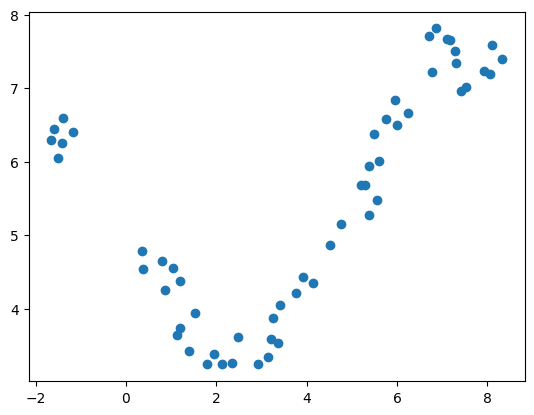

In [9]:
import umap
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP()

pitch = pitch.reshape(-1, 1)
scaled_pitch = StandardScaler().fit_transform(pitch) # estandariza los valores

embedding = reducer.fit_transform(scaled_pitch) 

import matplotlib.pyplot as plt

plt.scatter(
    embedding[:,0],
    embedding[:,1]
    )